In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

## Data import: data path, filename, data names

In [7]:
data_path = '/Users/annabelladrewanowski/Documents/UZH/Masterarbeit/Analysis/XTreme/processed data/XMCD grazing/'
file = '157b_1710-1727_6T_75K.csv'
data_names = ['Energy', 'minus1', 'plus1', 'plus2', 'minus2', 'minus3', 'plus3', 'cp_Hp', 'cm_Hp', 'cp_Hm', 'cm_Hm', 'XMCD_Hp', 'XMCD_Hm', 'XAS', 'XMCD', 'XAS_normalized_by_jump', 'XMCD_normalized_by_XAS_jump']
df = pd.read_csv(data_path+file, names = data_names, header = 0, skiprows = 2)


NameError: name 'pd' is not defined

In [2]:
plt.plot(df.Energy, df.cm_Hp, lw = 1.5)
plt.plot(df.Energy, df.cp_Hp, lw = 1.5, color = 'orange')
plt.title(file)
plt.show()

NameError: name 'plt' is not defined

## Linear background

In [10]:
def linear(x, a, b):
    return a*x+b

## Linear Fit background removal

In [11]:
# select pre peak range for linear fit
# select rows in columns 'Energy' and both polarizations meeting the specified condition (linear range right before peak)
# Plot the linear fits for both polarization calling the linear fit function

# can I do the slicing without using the whole dataframe? I want to be able to have an adaptable code so I want to just input the values: Energy_pre_peak, Energy, I_p, I_m and return the linear fits linear_p and linear_m

In [12]:
 def linear_fit(Energy_pre_peak):   
    pre_peak_range = df.loc[df['Energy']<= Energy_pre_peak, ['Energy', 'cp_Hp', 'cm_Hp']]
    x_range = pre_peak_range['Energy']
    y_range_p = pre_peak_range['cp_Hp']
    y_range_m = pre_peak_range['cm_Hp']
    # fitting parameter estimates : it might be enough to estimate slope of one polarization (they are very similar)
    a_guess = y_range_p.iloc[-1]-y_range_p[0]/np.abs(x_range.iloc[-1]-x_range[0])
    b = 0.1
    p0 = np.array([a_guess, b])
    popt_p, pcov_p = curve_fit(linear, x_range, y_range_p, p0)
    popt_m, pcov_m = curve_fit(linear, x_range, y_range_m, p0)
    # evaluate linear function with parameters from fit
    linear_p = linear(df.Energy, *popt_p) 
    linear_m = linear(df.Energy, *popt_m) #df['linear_fit_m']
    # plot the linear fit
    plt.figure(figsize=(10,8))
    plt.plot(df.Energy,linear_p, color = 'r')
    plt.plot(df.Energy, df.cp_Hp, lw = 3, label = 'cp Hp')
    plt.legend()
    plt.hlines(0, 565, 605, color = 'g')
    plt.title('linear fit pre edge range')
    # plt.savefig('157b_linear_fit_2T')
    plt.show()
    plt.figure(figsize=(10,8))
    plt.plot(df.Energy, linear_m, color = 'r')
    plt.plot(df.Energy, df.cm_Hp, lw = 3, label = 'cm Hp', color = 'orange')
    plt.legend()
    plt.hlines(0, 565, 605, color = 'g')
    plt.title('linear fit pre edge range')
    plt.show()
    return linear_p, linear_m

In [13]:
"""remove background from data
input: y_p, y_m: linear fit for both polarizations
       I_p, I_m: intensity spectrum of both polarizations 
       
return: Intensity of both polarization subtracted by linear fit respectively""" 


'remove background from data\ninput: y_p, y_m: linear fit for both polarizations\n       I_p, I_m: intensity spectrum of both polarizations \n       \nreturn: Intensity of both polarization subtracted by linear fit respectively'

In [14]:
def subtract_linear_background(y_p, y_m, I_p, I_m):
    subtracted_linear_p = I_p - y_p #df['subtracted_p']
    plt.figure(figsize=(10,8))
    plt.plot(df.Energy, subtracted_linear_p, lw = 3, label = 'linear background subtracted cp')
    plt.legend()
    plt.hlines(0, 565, 605, color = 'r')
    subtracted_linear_m = I_m - y_m #df['subtracted_m']
    plt.figure(figsize=(10,8))
    plt.plot(df.Energy, subtracted_linear_m, lw = 3, label = 'linear background subtracted cm', color = 'orange')
    plt.legend()
    plt.hlines(0, 565, 605, color = 'r')
    return subtracted_linear_p, subtracted_linear_m

In [15]:
"""calculate the xmcd = cm-cp
input:
I_p: Intensity pos polarization
I_m: Intensity neg polarization

""" 


'calculate the xmcd = cm-cp\ninput:\nI_p: Intensity pos polarization\nI_m: Intensity neg polarization\n\n'

In [46]:
def plot_xmcd(E, xmcd):
    plt.plot(E, xmcd, lw = 2)
    plt.hlines(0, 565, 605)
    plt.show()
    
def xmcd(E, I_p, I_m):
    xmcd = I_m - I_p
    plot_xmcd(E, xmcd)
    return xmcd

1. linear fit
2. remove linear fit
3. fermi step function

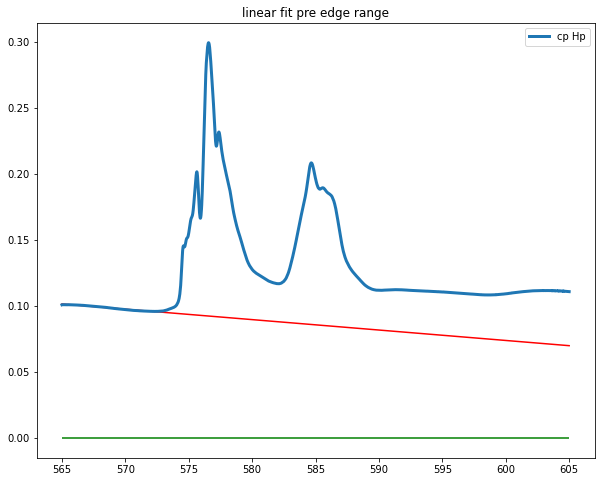

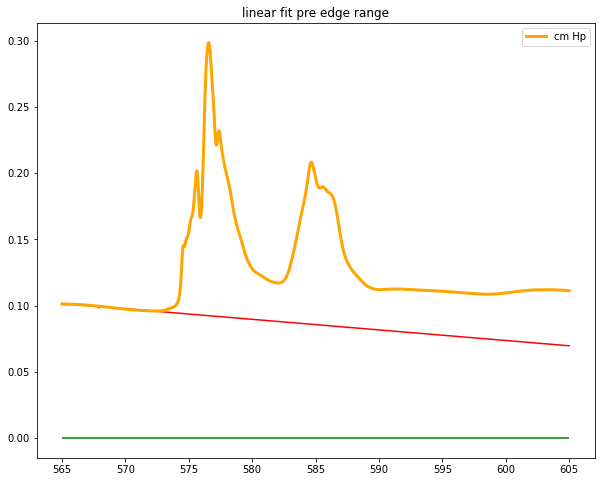

In [17]:
df['linear_fit_p'], df['linear_fit_m'] = linear_fit(573)

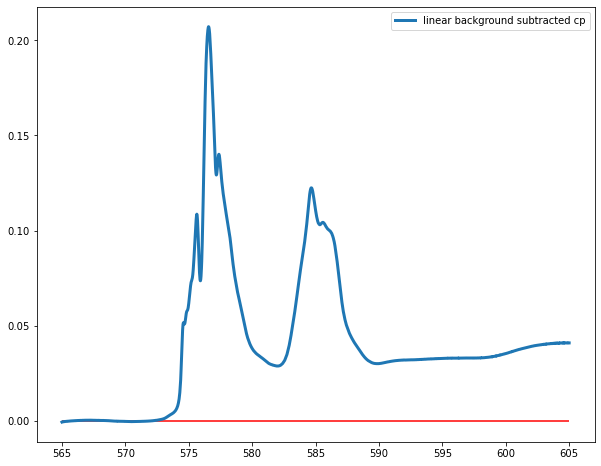

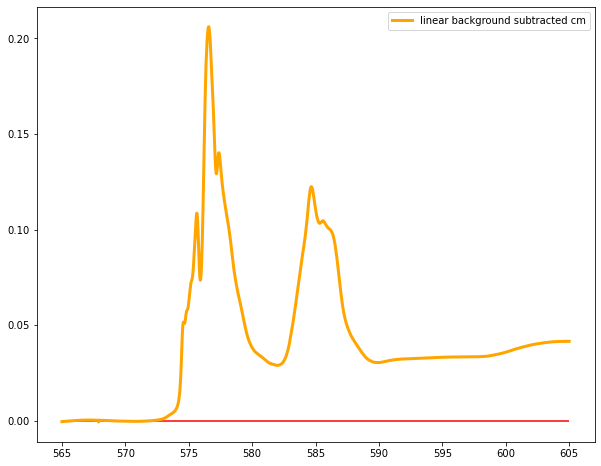

In [18]:
df['linear_subtracted_p'], df['linear_subtracted_m'] = subtract_linear_background(df.linear_fit_p, df.linear_fit_m, df.cp_Hp, df.cm_Hp)

In [19]:
# XMCD = cm-cp

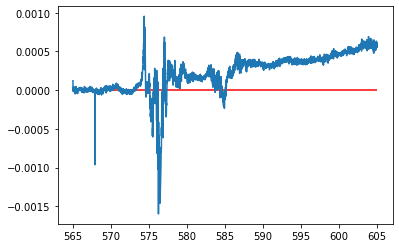

In [20]:
df['xmcd_linear'] = xmcd(df.linear_subtracted_p, df.linear_subtracted_m)

In [21]:
df.head()

,Energy,minus1,plus1,plus2,minus2,minus3,plus3,cp_Hp,cm_Hp,cp_Hm,...,XMCD_Hm,XAS,XMCD,XAS_normalized_by_jump,XMCD_normalized_by_XAS_jump,linear_fit_p,linear_fit_m,linear_subtracted_p,linear_subtracted_m,xmcd_linear
0,565.000,0.109301,0.104059,0.101888,0.101569,0.100703,0.100025,0.100957,0.101136,0,...,0,0.012138,0.000179,-0.004820,0.000498,0.101586,0.101644,-0.000629,-0.000508,0.000121
1,565.011,0.109266,0.104054,0.102049,0.101542,0.100737,0.100031,0.101040,0.101140,0,...,0,0.012214,0.000099,-0.004562,0.000305,0.101577,0.101635,-0.000537,-0.000496,0.000042
2,565.022,0.109242,0.104086,0.102075,0.101525,0.100702,0.100012,0.101044,0.101113,0,...,0,0.012181,0.000070,-0.004571,0.000234,0.101569,0.101626,-0.000525,-0.000513,0.000012
3,565.033,0.109284,0.104063,0.102078,0.101517,0.100698,0.100047,0.101062,0.101108,0,...,0,0.012184,0.000045,-0.004492,0.000173,0.101560,0.101618,-0.000497,-0.000510,-0.000012
4,565.044,0.109219,0.104049,0.102059,0.101536,0.100706,0.100001,0.101030,0.101121,0,...,0,0.012154,0.000091,-0.004491,0.000283,0.101551,0.101609,-0.000521,-0.000488,0.000033


Clarification: 
            cp_Hp  -> xas(+)
            cm_Hp  -> xas(-)
            xmcd = cm_Hp - cp_Hp
            xas = 0.5*(cm_Hp + cp_Hp)
One still need to subtract the ad hoc Fermi Step

# Fermi Step

In [22]:
def Fermi_step(df, E_min = 589, E_cutoff = 600, epsilon = 0, delta = 1):
    def mu_step(x, E_l3, E_l2, step_e, delta, height, a):
            b = 1-a
            return height*(1- a*(1/(1+np.exp((x-E_l3-step_e)/delta))) - b*(1/(1+np.exp((x-E_l2-step_e)/delta))))
    # select energy range for step size h and find mean as an estimate
    energy_post_range = df.loc[(df['Energy'] >= E_min) & (df['Energy']<= E_cutoff), ['linear_subtracted_p', 'linear_subtracted_m']]
    h = energy_post_range[['linear_subtracted_p', 'linear_subtracted_m']].mean() 
    #print(h[0])
    # find peak positions
    peak_range_l3 = df.loc[(575 <= df['Energy']) & (df['Energy'] <= 580), ['linear_subtracted_p', 'linear_subtracted_m']].idxmax()
    peak_l3_cp = df['Energy'].iloc[peak_range_l3[0]]
    peak_l3_cm = df['Energy'].iloc[peak_range_l3[1]]
    peak_range_l2 = df.loc[(583 <= df['Energy']) & (df['Energy'] <= 588), ['linear_subtracted_p', 'linear_subtracted_m']].idxmax()
    peak_l2_cp = df['Energy'].iloc[peak_range_l2[0]]
    peak_l2_cm = df['Energy'].iloc[peak_range_l2[1]]
    # plug in parameters into step function and return function
    step_fct_cp = mu_step(df['Energy'].to_numpy(), peak_l3_cp, peak_l2_cp, epsilon, delta, h[0], 2/3)
    #step_fct_cp
    step_fct_cm = mu_step(df['Energy'].to_numpy(), peak_l3_cm, peak_l2_cm, epsilon, delta, h[1], 2/3)
    return step_fct_cp, step_fct_cm


In [23]:
"""function to plot out fermi step function together with intensity spectrum (with subtracted linear background)
input: energy, I_p: intensity positive pol, I_m: intensity minus pol, Fermi step functions for both polarizations"""

'function to plot out fermi step function together with intensity spectrum (with subtracted linear background)\ninput: energy, I_p: intensity positive pol, I_m: intensity minus pol, Fermi step functions for both polarizations'

In [24]:
def plot_Fermi(Energy, I_p, I_m, fermi_cp, fermi_cm):
    plt.figure(figsize=(10,8))
    plt.plot(Energy, I_p, lw = 3, label = 'cp')
    plt.plot(Energy, fermi_cp)
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,8))
    plt.plot(Energy, I_m, lw = 3, color = 'orange', label = 'cm')
    plt.plot(Energy, fermi_cm)
    plt.legend()

In [25]:
def subtract_Fermi(I_p, I_m, Fermi_cp, Fermi_cm):
    I_subtracted_fermi_p = I_p - Fermi_cp # df['subtracted_Fermi_cp']
    I_subtracted_fermi_m = I_m - Fermi_cm # df['subtracted_Fermi_cm']
    plt.figure(figsize=(10,8))
    plt.plot(df.Energy, I_subtracted_fermi_p, lw = 3)
    plt.hlines(0, 565, 605, color = 'red')
    plt.show()
    plt.figure(figsize=(10,8))
    plt.plot(df.Energy, I_subtracted_fermi_m, lw = 3, color = 'orange')
    plt.hlines(0, 565, 605, color = 'red')
    plt.show()
    return I_subtracted_fermi_p, I_subtracted_fermi_m

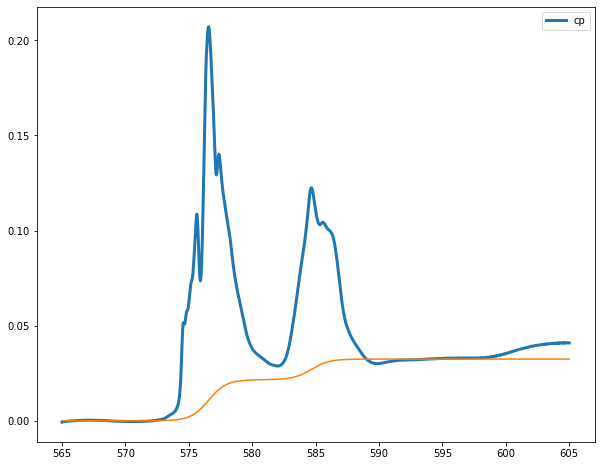

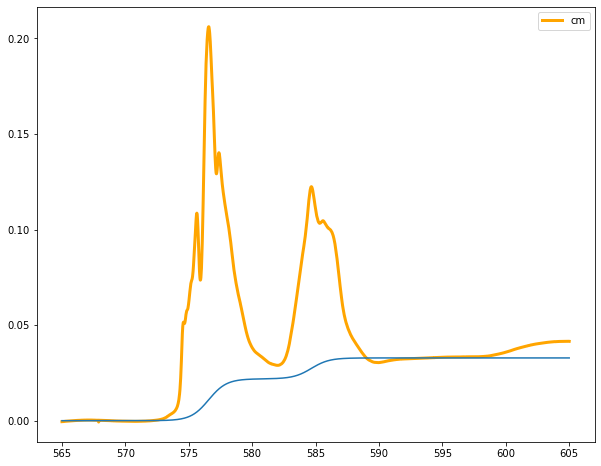

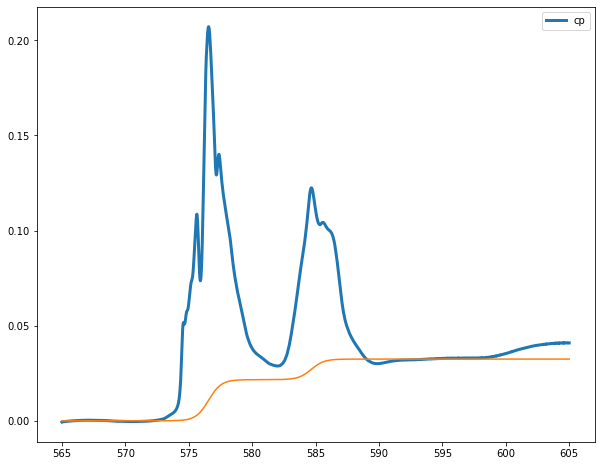

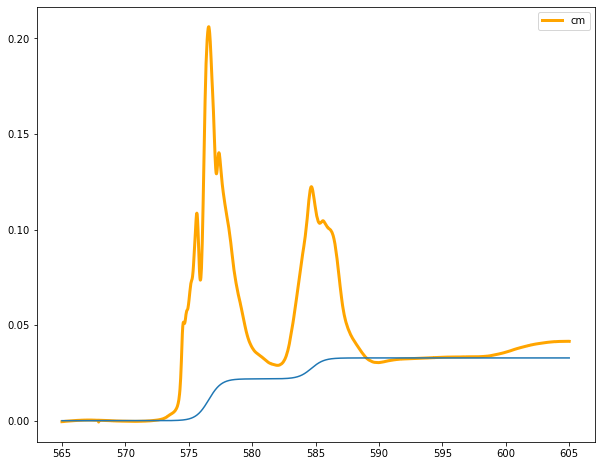

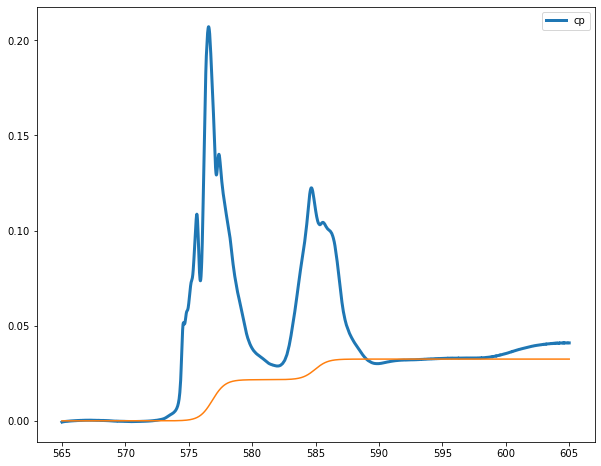

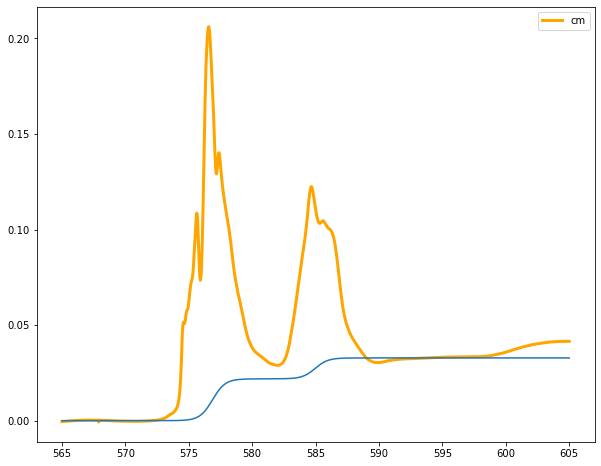

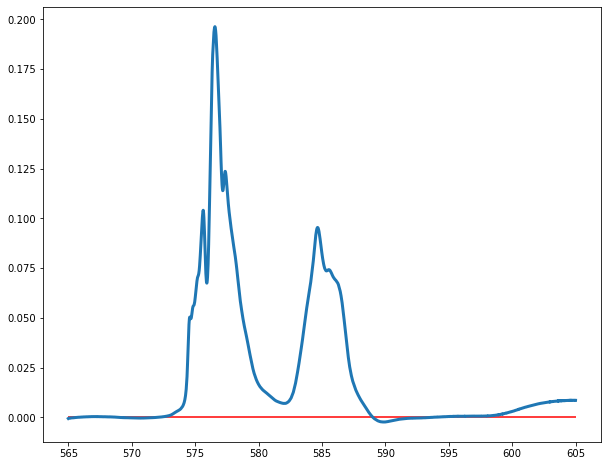

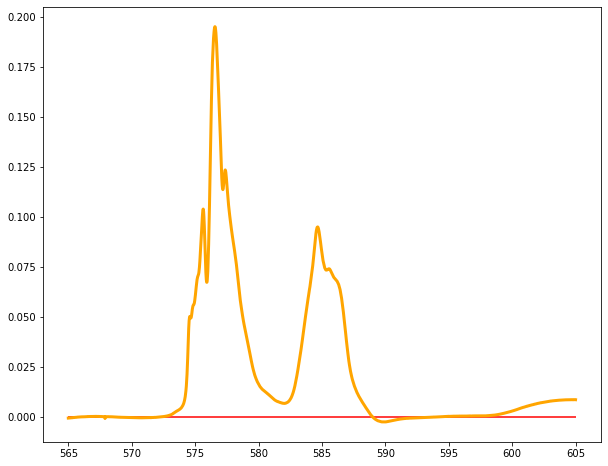

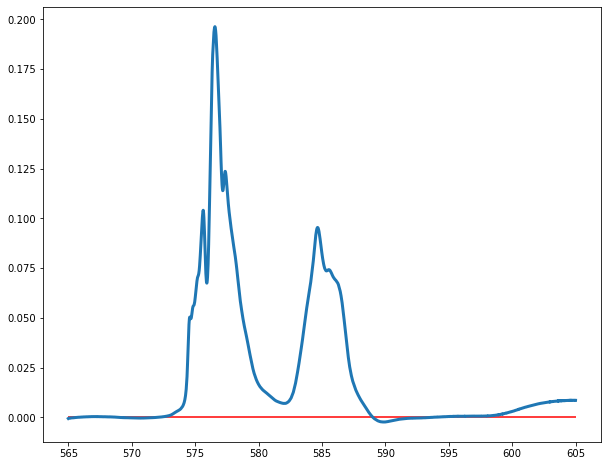

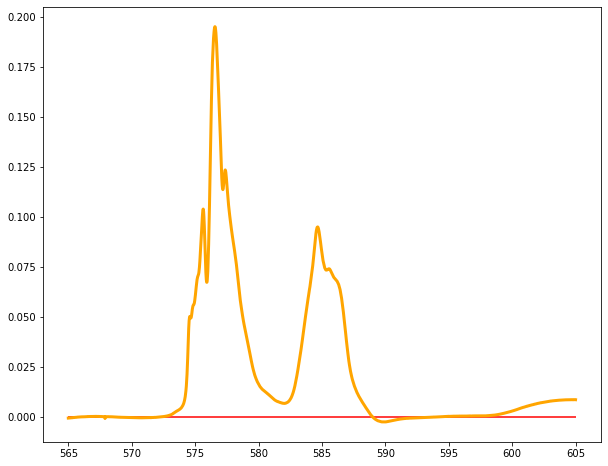

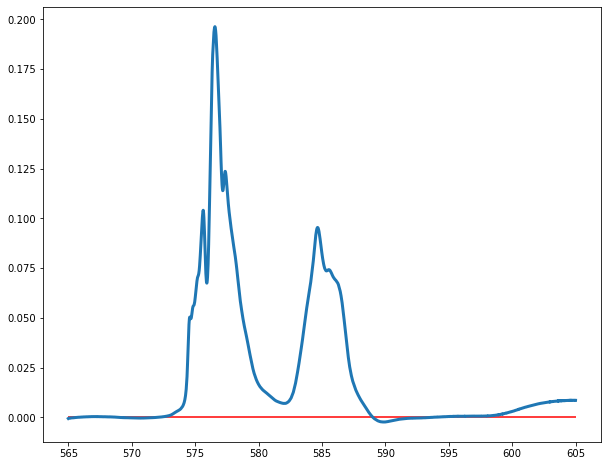

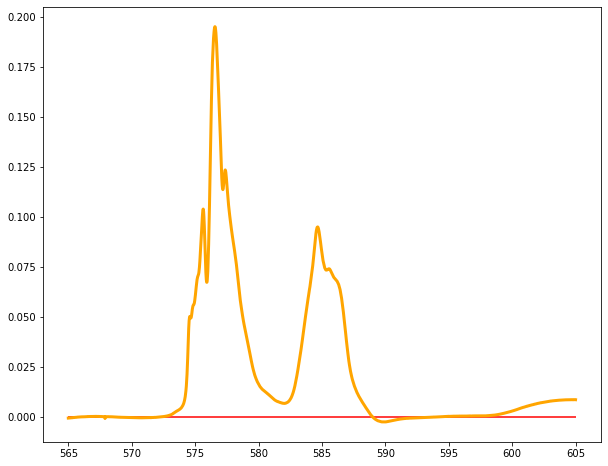

In [38]:
step_fct_cp, step_fct_cm = Fermi_step(df, 589, 600, 0, 0.7)
step_fct_cp1, step_fct_cm1 = Fermi_step(df, 589, 600, 0, 0.5)
step_fct_cp2, step_fct_cm2 = Fermi_step(df, 589, 600, 0.3, 0.5)

plot_Fermi(df.Energy, df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp, step_fct_cm) 
plot_Fermi(df.Energy, df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp1, step_fct_cm1) 
plot_Fermi(df.Energy, df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp2, step_fct_cm2) 

# df['final_I_p'], df['final_I_m'] = subtract_Fermi(df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp, step_fct_cm)
df['final_I_p_epsilon_07'], df['final_I_m_epsilon_07'] = subtract_Fermi(df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp, step_fct_cm)
df['final_I_p_epsilon_05'], df['final_I_m_epsilon_05'] = subtract_Fermi(df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp, step_fct_cm)
df['final_I_p_delta_03_epsilon_05'], df['final_I_m_delta_03_epsilon_05'] = subtract_Fermi(df.linear_subtracted_p, df.linear_subtracted_m, step_fct_cp, step_fct_cm)




- change parameters a little 
- overlap -> integral for sum rules difficult... not for now
- more qualitative comparisons
- plot different strains (shift in energy? different valences)
- xmcd 

Q: how to compare the effect of parameters in fermi step -> which one to chose

Next step: new script to compare all kinds of xmcd's

In [42]:
# print(df.head())

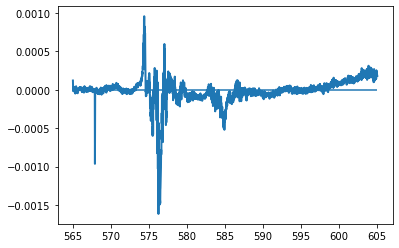

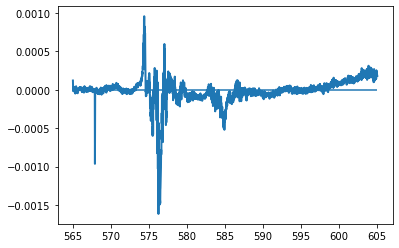

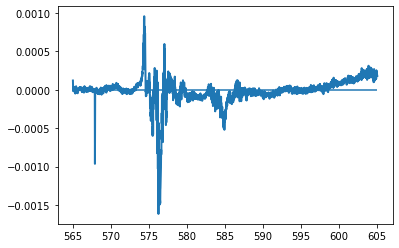

In [48]:
# cut off energy above 600
# df['xmcd_final'] = xmcd(df.final_I_p, df.final_I_m)
df['xmcd_final_0.7'] = xmcd(df.Energy ,df['final_I_p_epsilon_0.7'], df['final_I_m_epsilon_0.7'])
df['xmcd_final_0.5'] = xmcd(df.Energy ,df['final_I_p_epsilon_0.5'], df['final_I_m_epsilon_0.5'])
df['xmcd_final_0.3_0.5'] = xmcd(df.Energy ,df['final_I_p_delta_03_epsilon_05'], df['final_I_m_delta_03_epsilon_05'])

# plot_xmcd(df.Energy, df['xmcd_final_0.7'])
# plot_xmcd(df.Energy, df['xmcd_final_0.5'])
# plot_xmcd(df.Energy, df['xmcd_final_0.3_0.5'])


In [49]:
# df.head()